In [2]:
import pandas as pd
covid_df = pd.read_csv('data/covid_df.csv')

### Основные параметры метода plot()

x — название признака, который будет отложен по оси абсцисс;<br>
y — название признака, который будет отложен по оси ординат;<br>
figsize — размер графика (кортеж из ширины и высоты в дюймах);<br>
kind —тип визуализации. Основные типы:<br>
- 'line' — линейный график (по умолчанию);<br>
- 'bar' — столбчатая диаграмма;<br>
- 'barh' — горизонтальная столбчатая диаграмма;<br>
- 'hist' — гистограмма;<br>
- 'box' — коробчатая диаграмма (boxplot);<br>
- 'pie' — круговая диаграмма;<br>
- 'scatter' — диаграмма рассеяния.<br>

grid — отображение сетки (по умолчанию False);<br>
legend — отображение легенды (по умолчанию False);<br>
title — название графика;<br>
color — цвет.<br>
___
lw - ширина линии для линейного графика<br>
bins - число прямоугольников в гистограмме<br>
colormap - цветовая гамма графика

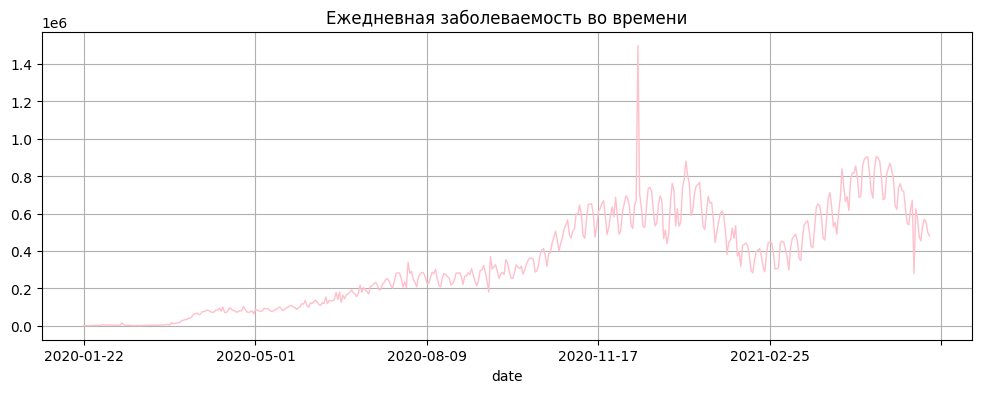

In [3]:
# Изменение ежедневного числа заболевших во всём мире во времени

grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    color = 'Pink',
    lw=1
);

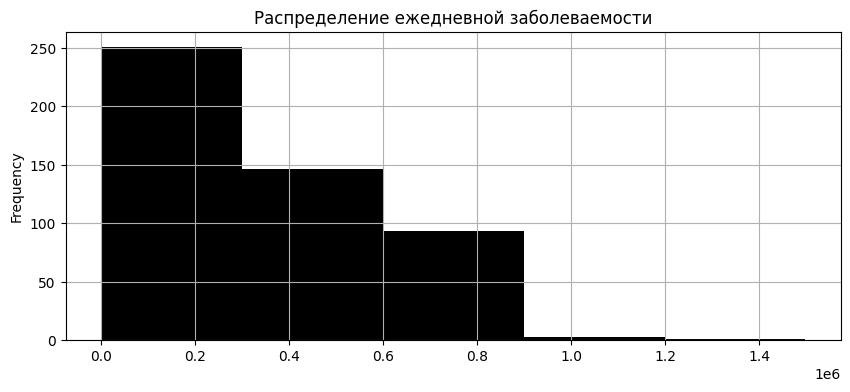

In [4]:
# Распределение ежедневной заболеваемости во всём мире

grouped_cases.plot(
    kind='hist',
    figsize=(10, 4),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=5
);

###### По гистограмме можно судить о частоте попадания ежедневной заболеваемости в определённый интервал. На оси абсцисс отложен диапазон ежедневной заболеваемости (в млн человек), разбитый на десять равных интервалов, на оси ординат — число наблюдений, попавших в этот интервал.

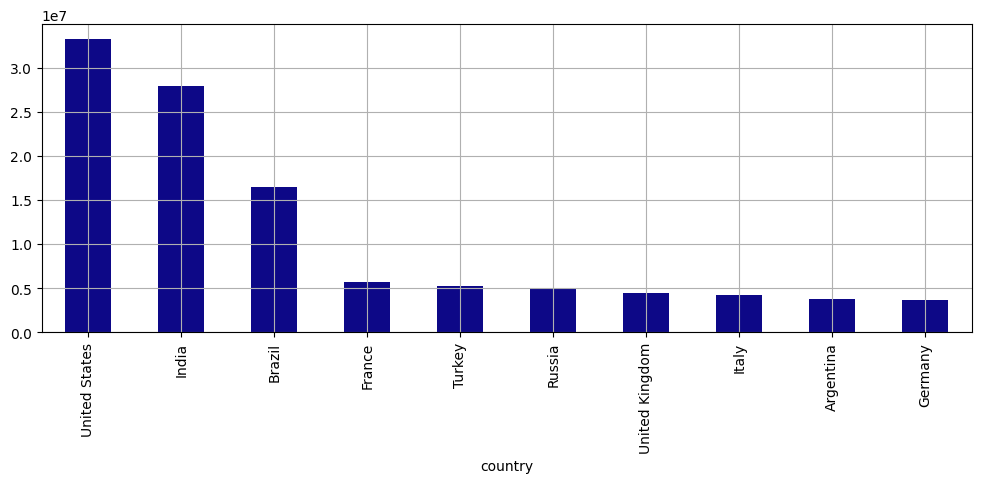

In [5]:
# ТОП-10 стран по суммарной заболеваемости

grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

###### На диаграмме видно, что лидерами по числу заболевших являются Соединённые Штаты, Индия и Бразилия. Соотношение зафиксированных случаев заражения в остальных странах примерно одинаковое.

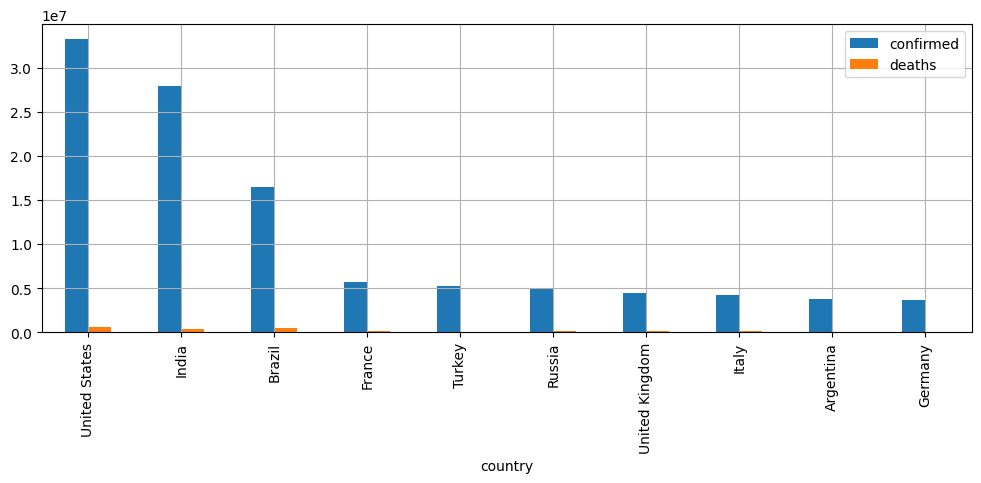

In [6]:
# Соотношение количества заболевших и умерших от вируса

grouped_country = covid_df.groupby('country')[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(
    kind='bar', 
    grid=True,
    figsize=(12, 4),
    );

###### Очевидно, что отношение числа умерших к числу заболевших весьма низкое. Также это может косвенно говорить о разных методиках учёта заболевших (например, какие-то страны могут учитывать заболевших только по мазку, в то время как другие — по клинической картине, учитывающей и другие показатели). То есть с методической точки зрения учёт по числу заражений может быть не совсем корректным. Лучшим показателем будет являться число смертей (хотя и этот метод не идеален).

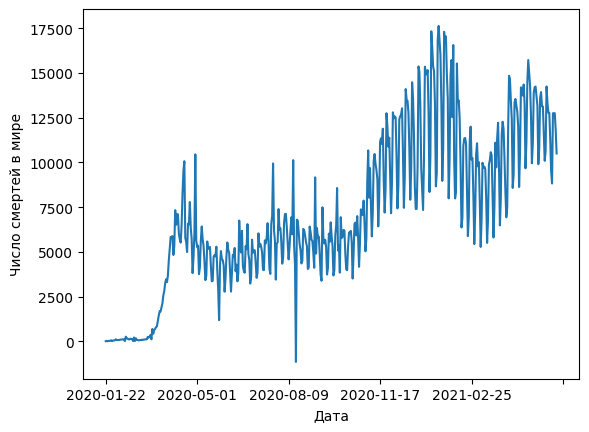

In [7]:
grouped_cases = covid_df.groupby('date')['daily_deaths'].sum()
grouped_cases.plot(kind='line',xlabel='Дата', ylabel='Число смертей в мире');

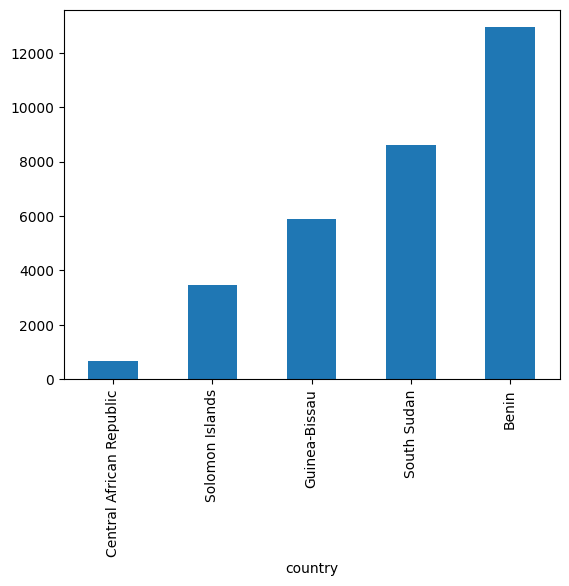

In [8]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');